# Evolutionary optimization for Amazon Fresh Deliveries

Name: Siddhesh Masurkar<br>
Id: 10469629<br><br>
Name: Gagan Dehal<br>
Id: 10457776

#### Table of contents
---
1.   Introduction
2.   Evolutionary algorithm
3.   Genetic algorithm
4.   Advantages
5.   Implementation
6.   Improvements
7.   Conclusion<br><br><br>



### Introduction

We are addressing an optimization problem where a number of points in the 2D space are given, and the aim is to optimize the distances covered to go through each point once and return to the initial point.This approach is focused to what delivery services like Amazon Fresh are required to do on a daily basis.  We are using Genetic Algorithms, a form of Evolutionary Algorithms to find the optimal route for the same, no matter what the orientation is in space.

These algorithms use probabilistic changes in the generation cycle to optimize the solutions. This approach can be used to find optimal routes where the distance travelled is minimum, and the displacement is zero.


### Evolutionary Algorithms

Evolutionary Algorithms are a heuristic approach(i.e.,approach where all the factors might not be considered, but it is more efficient to avoid them as parameters than to calculate and include them.) that simulates a closed environment with a population that undergoes process similar to natural selection. EAs are  consist of 4 phases:
Initialization, Selection, Genetic Operators and Termination.

#### Initialization
A population of solutions is considered, which has various random solutions as individuals in the population. These individuals can be paired for mating and the offspring algorithms will have attributes as a combination of both parent algorithms.

#### Selection
Before the population can be paired, it is evaluated using a fitness function which calculates its optimality. This function is hence used as a criteria to select the best of the population to be created a replica of. The individuals that are thus chosen vary in attributes and can have different combinations of those attributes present. The group of these points that satisfy the fitness function optimally is called the Pareto Frontier. These optimal solution points cannot be further compared to each other and they represent optimality in different aspects.

#### Genetic Operators(Crossover and Mutation)
This step is based around reproduction and combining of a two-parent solution set into the building of a new generation of solutions. Hence, the next generation will have attributes that are a combination of both parents. But, this does not allow any scope for new attributes to creep into the simulated environment. To address this, a phenomenon similar to genetic mutation is carried out. An offspring individual is chosen at random from the population and assigned to go through a change in the said attributes. This step is carried out at random, and with a probabilistic approach that any aspect of the offspring's attributes can change.

#### Termination
This is the final phase in the evolutionary algorithm. Termination is the stage where the parent population has reached the end of its lifecycle and is terminated. One cycle for completion of each phase can be defined as the lifecycle of one generation. At this point, we have a new generation of solutions that has been reproduced and mutated, the parent solutions that are used for the new generation, and the population from the parent solution set that did not get to reproduce. The previous generation will be eradicated in the hope that all the desirable attributes have been trasferred to the next generation.

This defines the basic working of the evolutionary algorithm.

### Genetic algorithm


We are using genetic algorithm a type of evolutionary algorithm to optimize amazon fresh deliveries. We are using mutation and crossover to create variations in the solution space. The selection of the individuals to be used for reproduction is carried out by a fitness function. This function calculates the total trip distance for each solution. The purpose of this function is to choose the sample with minimum trip distance. This approach is best suited for a situation where traversing through a point is a necessity. So finding the best solution comes from combining good, random solutions repeatedly.


### Advantages of Genetic algorithm


**Conceptually simple and widely applicable**<br>
The process can be simply written as the function below<br> P[t+1] = S(V(P[t])) where P[t] is the population at time t, P[t+1] is the population at time t+1, V is the variation in population(crossover, mutation,) and S is the selection function with respect to the fitness. The underlying procedure of genetic algorithm is so universal that it is domain independant. It can be applied to many problems across disciplines.

**Parallelism**<br>
Population generation, fitness calculation, genetic operators over individuals are all processes which can be run in parallel. In fact only the selection process requires serial processing for comparisons. With increase in computation power and distributed computing, genetic algorithms can now be used to solve more complex problems.

**Multiple optimal solutions**<br>
A stopping criteria can be specified or the total number of generations the evolution will run is specified. The selection process makes sure at every generation the individuals with least fitness are dropped and the individuals with high fitness are passed on to the next generation. At each generation the individuals keep getting better. Hence when we find the optimal solution or the total number of generations is reached the individuals in the last generation are all efficient solutions to the problem.

### Implementation

We are using pyeasyga, a genetic algorithm library in python. It provides an easy-to-use interface of the genetic algorithm framework and allows us to code custom methods to solve our problem at hand.<br>
Reference: https://pyeasyga.readthedocs.io/en/latest/index.html

In [ ]:
pip install pyeasyga

In [ ]:
import numpy as np
from pyeasyga import pyeasyga
import matplotlib.pyplot as plt

We are implementing the genetic algorithm to demonstrate and solve a subset of the problem. Lets assume at region Hoboken, Amazon fresh has 19 deliveries to be made at 19 different locations. There is a warehouse from where the goods will be picked. Lets call it location 0. It will be the starting point of the delivery van. The 19 deliveries must be made in an efficient way to reduce time and deliver goods fresh. After the 19 deliveries the delivery vehicle will return to the warehouse to reload goods for the next set of deliveries.

In [ ]:
# setting starting position as 0th location
starting_pos = 0

In [ ]:
def create_individual(data):

  n = data['n_locations']

  # with starting position fixed rest of the traversal is randomly generated
  return np.concatenate(([starting_pos], np.random.choice(a=range(1,n),
                   size=n-1,
                   replace=False)))

In [ ]:
def selection(population):

  #randomly choose an individual from the population
  n = np.random.choice(len(population))

  return population[n]

In [ ]:
def mutate(individual):

  #randomly choose two locations
  choices = np.random.choice(
      a=range(len(individual)),
      size=2,
      replace=False)

  #swap two locations
  individual[choices[0]], individual[choices[1]] = individual[choices[1]], \
  individual[choices[0]]

  return individual

In [ ]:
def remove_duplicates_and_merge(arr_1, arr_2, n):

  # find duplicates from array 1 and 2
  duplicates = np.intersect1d(arr_1, arr_2)
  #print('duplicates:',duplicates)

  if len(duplicates)>0:
    # find missing values to replace the duplicates
    missing_values = set(range(n)).difference( np.concatenate((arr_1, arr_2)) )
    #print('missing_values:',missing_values)

    for d in duplicates:
      index = np.where(arr_1==d)[0][0]
      #print(index)
      arr_1[index] = missing_values.pop()
      #print(arr_1)

  return np.concatenate((arr_1, arr_2))

In [ ]:
#One Point Crossover
def crossover(individual_1, individual_2):

  n = len(individual_1)
  split = np.random.choice(a=range(1, n-1))

  # create child routes with locations from two parents split randomly
  child_1 = remove_duplicates_and_merge(individual_1[:split], individual_2[split:], n)
  child_2 = remove_duplicates_and_merge(individual_2[:split], individual_1[split:], n)

  return child_1, child_2

In [ ]:
# n^2 complexity to create the distance matrix
def compute_distance_matrix(locations):

  n = len(locations)
  distance_matrix = np.zeros((n, n))

  # storing distance from one location to every location
  # it fastens the overall process
  for i in range(n):
    for j in range(n):
      if i == j:
        continue
      # L2 norm
      distance_matrix[i][j] = np.linalg.norm(locations[i] - locations[j])

  return distance_matrix

In [ ]:
def fitness(individual, data):

  # for our problem, fitness is the total distance travelled
  fitness = 0
  distance_matrix = data['distance_matrix']
  n = data['n_locations']

  for i in range(n-1):
    fitness += distance_matrix[individual[i], individual[i+1]]

  # GA is set to maximize hence storing negative fitness
  return -fitness

In [ ]:
def plot_route(individual, data):

  locations = data['locations']
  n = data['n_locations']

  plt.figure(figsize=(12, 8))

  # add background image
  img = plt.imread('stevens_map.png')
  plt.imshow(img, extent=[0, 500, 0, 400], aspect='auto')

  # plot locations
  plt.scatter(x=locations[:,0], y=locations[:,1], s=400)
  plt.scatter(x=locations[starting_pos,0], y=locations[starting_pos,1], s=400 ,c='red')

  # index the locations
  for i in range(n):
    plt.text(locations[i][0], locations[i][1], str(i), horizontalalignment='center',
             verticalalignment='center', size=12, c='white')

  # plot routes if solution given
  if len(individual)>0:
    for i in range(n):
      i1 = individual[i]
      if i != n-1:
        i2 = individual[i+1]
      else:
        i2 = individual[0]
      x = [locations[i1][0], locations[i2][0]]
      y = [locations[i1][1], locations[i2][1]]
      plt.plot(x,y,color='green')

  plt.show()

We found a solved example of graph traversal. We have used the same coordinates as locations so that we can verify our solution with the shortest path.

In [ ]:
locations = np.array([[35, 51],
                   [113, 213],
                   [82, 280],
                   [322, 340],
                   [256, 352],
                   [160, 24],
                   [322, 145],
                   [12, 349],
                   [282, 20],
                   [241, 8],
                   [398, 153],
                   [182, 305],
                   [153, 257],
                   [275, 190],
                   [242, 75],
                   [19, 229],
                   [303, 352],
                   [39, 309],
                   [383, 79],
                   [226, 343]])

In [ ]:
data = dict()
data['locations'] = locations
data['distance_matrix'] = compute_distance_matrix(locations)
data['n_locations'] = len(locations)

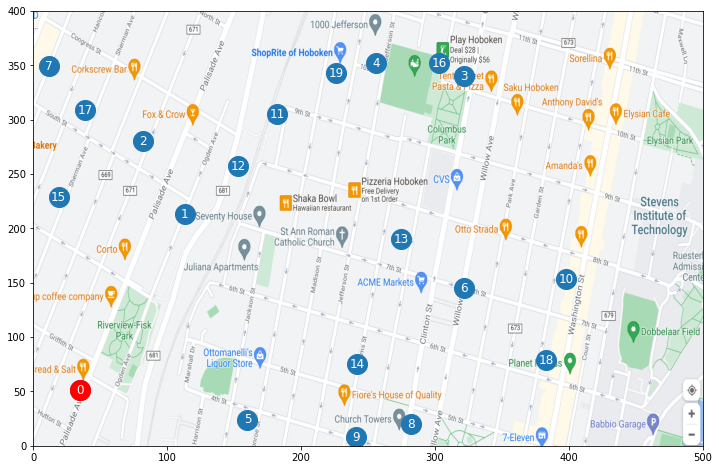

In [ ]:
plot_route([], data)

In [ ]:
ga = pyeasyga.GeneticAlgorithm(data,
                               population_size=100,
                               generations=2000,
                               crossover_probability=0.3,
                               mutation_probability=0.4,
                               elitism=True,
                               maximise_fitness=True)

In [ ]:
# setting all the custom created methods to the GA framework
ga.create_individual = create_individual
ga.crossover_function = crossover
ga.mutate_function = mutate
ga.selection_function = selection
ga.fitness_function = fitness

In [ ]:
ga.run()

In [ ]:
ga.best_individual()

(-1557.7424899436573,
 array([ 0,  5, 14,  9,  8, 18, 10,  6, 13, 12,  2, 17,  7, 15,  1, 11,  3,
        16,  4, 19]))

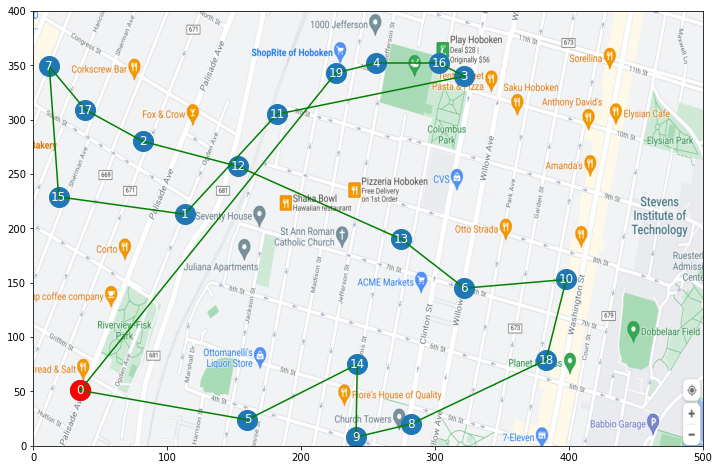

In [ ]:
plot_route(ga.best_individual()[1], data)

### Improvements

####Variable length solutions<br>
As discussed before, one of the advantages we chose genetic algorithm is because it provides multiple optimal solutions. Lets assume there are 500 locations to be visited in a given region in one day. Our implementation will provide multiple efficient routes to traverse all the locations.<br>
But all the locations cannot be traversed by a single delivery van. There will be multiple delivery vans to deliver the orders. Hence the current idea is not implementation ready. The next and most important improvement will be to get variable length solutions. Currently the individual size(traversal size) is equal to the number of locations. By reducing the individual size we will get smaller loops of locations over the entire region. These smaller loops of locations can be traversed by Amazon delivery vans.

### Conclusion


We compared the above plotted results with the graph solution we already had. The route length is close to the best route length. The framework allows us to get all the solutions from the last generations using ga.last_generation(). We sorted the solutions with least length. The routes followed by the best were different but close to the best routes. Thus getting multiple efficient solutions.<br><br>
We believe our approach is viable. We aimed to find efficient solutions to a problem that requires high computational power to solve. We are able to find multiple solutions in very less time.
One drawback of this approach is the program has to run many generations to consistently get good results. Due to the stochastic nature of the program, running for less generations did not give us good results.
With increase in computational power and distributed computing it has become possible to solve such complex problems with evolutionary algorithms. It benefits a lot from parallel processing.

